Setting up LLM

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from outlines import models
import outlines
model_id = "facebook/opt-1.3b"
llm = AutoModelForCausalLM.from_pretrained(model_id, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = models.Transformers(llm, tokenizer)

w:\receipt_ocr\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
w:\receipt_ocr\venv\Lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(


In [9]:
from openai import OpenAI
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

Setting up Pydantic Model

In [2]:
from pydantic import BaseModel
class Receipt(BaseModel):
    category: str
    date: str
    total: int

OCR

In [3]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
def preprocess_image(image_path):
    dpi = 300
    img = Image.open(image_path)
    img.info['dpi'] = (dpi, dpi)
    img = np.array(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    opt_thr, img_ = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    return img_

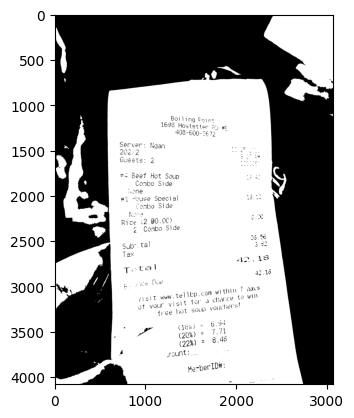

In [4]:
processed_img1 = preprocess_image('receipt1.jpg')
plt.imshow(processed_img1, cmap = 'gray')

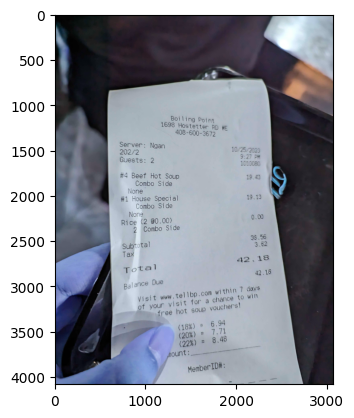

In [12]:
og_img1 = cv2.imread('receipt1.jpg')
plt.imshow(og_img1, cmap = 'gray')

In [5]:
text = pytesseract.image_to_string(processed_img1, config = '--oem 3 --psm 6')
print(text)

b
Boilin |
1698 Hostetter oy ae
408-600-7677
° Server: gan
evere er a
' > Beet Hot Soup Leos
Combo Side ero |
ihvane |
: Bi couse Special oe N
Combo Side 7. ee
_ Rice 12 @0.00? 1x
bg ~ Combo Side
Sub>. tal 3.8
, Tax =
Total a>. is
t?
| 42.18
gisit ww cel Vep con within! day F
ot your visit ter 4 chance te wih
free fot Soup VOUCHELS |
me (yom) = TT}
(22%) = g 4d
4 |
eounts.
ge * uenber IDF:



Information extraction

In [6]:
generator = outlines.generate.json(model, Receipt)

In [7]:
template =    '''
Your task is to generate a Pydantic model from a scanned real receipt. There are three things that you need to extract which are spending category, the date of the receipt and the total amount. If any information is missing just leave the field blank.
This is an example of how the output looks like: Receipt(category = 'Food', date = '12/1/2024', amount = '25'). Do not include this in your output.
Below is the scanned prescription, please extract the required information from it.
{}
'''

In [8]:
receipt = generator(template.format(text))

OPTModel is using SDPA attention, which currently does not support output_attentions=True.failing back to eager attention. remove warning using attn_implementation="eager".


KeyboardInterrupt: 

In [15]:
print(repr(receipt))

Receipt(category='; . r,', date='; . r,', total=1748854594225524821073300871778053263062433531682656367062216611977401540195002320647507620715552349430437215102245102411072655569263206166211778091756654061520420230959259212723460623088394139279756660172073159974772884280233741987201018502220246007252728324403461614464290904750561200417605556933318148199038745052934949356850430031105578360713216724399408343038448952510753329633146749830202121306030396052042100606352713046033122531)
